## Wildfire_Prediction_in_Bejaia

**About the data:**

  This dataset contains information about fires in Bejaya in 5 months (June, July, Auguest, September and October ) from 2012-2023


1. **Day**
1. **Month**
1. **Year**
1. **Temperature:** in celsius
1. **RH** : Relative Humidity in %
1. **Rain**: of one day in mm 
1. **Ws:** wind speed in km/h
1. **Pres:** air pressure in hPa

- Mesures of Canadian Fire Whether Index System:
1. **FFMC**: Fine Fuel Moisture Code, that measures the moisture content of fine fuels, such as grasses, leaves, and other small plants that can quickly ignite.
1. **DMC**: Duff Moisture Code, measures the moisture content of the decomposed organic material beneath the surface litter.
1. **DC**: Drought Code, represents the moisture content of deep organic layers in the soil.
1. **ISI**: Initial Spread Index, It takes into account factors such as wind speed and the Fine Fuel Moisture Code (FFMC) to estimate the potential rate of spread of a fire when it is first detected. 
1. **BUI**: Buildup Index, provides an indication of the potential fire intensity and difficulty of control
1. **FWI**: Fire Weather Index: 0 to 31.1, calculated by combining: FFMC, DMC, DC, ISI and BUI. It provides a comprehensive numerical rating of fire danger.
1. **Classes**: two classes, namely: 
  * fire  
  * not Fire


## Data Preprocessing:

In [76]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings("ignore")

In [46]:
#import the dataset
df = pd.read_csv('Bejaia_forest_fires_dataset.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [48]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [49]:
#remove space from RH and Ws
df.rename(columns={' RH': 'RH',' Ws':'Ws'}, inplace=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [50]:
# check Relative Humidity(RH) values to be between 0% and 100%
invalid_values = df.loc[(df['RH'] < 0) | (df['RH'] > 100), 'RH']

# Display rows with invalid values
if not invalid_values.empty:
    print("Rows with invalid 'RH' values:")
    print(df.loc[(df['RH'] < 0) | (df['RH'] > 100), :])
else:
    print("All RH values are within the valid range.")

All RH values are within the valid range.


In [51]:
#check for duplicates 
dups = df.duplicated()
print('Number of duplicate rows : %d' % (dups.sum()))

Number of duplicate rows : 0


In [52]:
#check for null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [53]:
#Drop null values
df = df.dropna()
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [54]:
#since the year has only asingle value we don't need it for prediction
df = df.drop(['year'], axis=1)
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


## Exploratory Data Analysis:

In [55]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [56]:
# 0 is not fire and 1 is fire
df['Classes'] = df['Classes'].replace({'not fire': 0, 'fire': 1})
df['Classes'].unique()

array([0, 1], dtype=int64)

In [57]:
df['Classes'].value_counts()

Classes
0    63
1    59
Name: count, dtype: int64

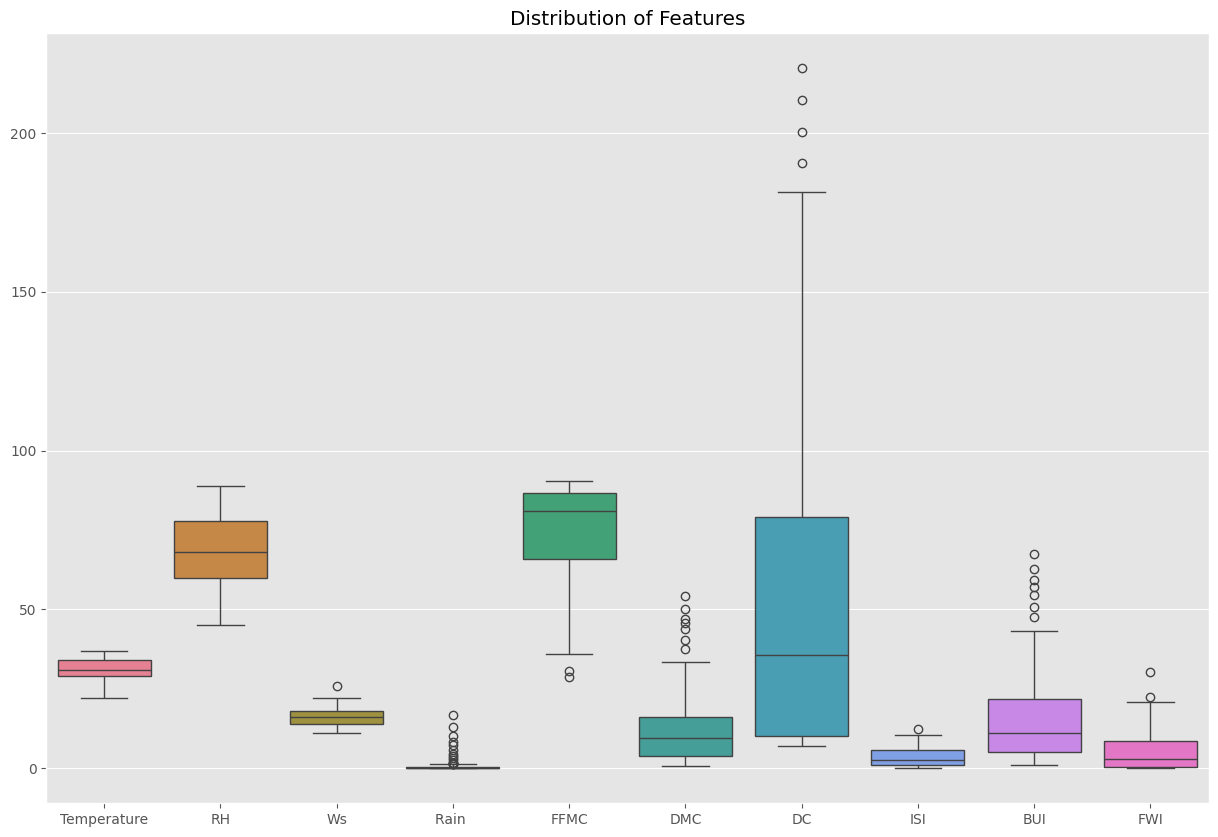

In [58]:
#plot the box plot for features to checking outliers
features = df.drop(['day', 'month', 'Classes'],axis=1)
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.boxplot(data=features)
plt.title('Distribution of Features')
plt.show()

We notice that the dataset contains outliers. So we will remove then using the Z-score method

**Remooving outliers using Z-score:**

In [59]:
# Define a function to remove outliers based on Z-Score for specific features
def remove_outliers_zscore_specific(data, features, threshold=3):
    data_no_outliers = data.copy()

    for feature in features:
        # Convert non-numeric values to NaN and drop them
        feature_numeric = data[feature].apply(pd.to_numeric, errors='coerce').dropna()

        # Calculate Z-scores for the feature
        z_scores = ((feature_numeric - feature_numeric.mean()) / feature_numeric.std()).abs()

        # Identify and remove rows with outliers for the feature
        data_no_outliers = data_no_outliers.loc[z_scores < threshold]

    return data_no_outliers

# Apply the function to remove outliers for specific features
df_no_outliers_specific = remove_outliers_zscore_specific(df,features, 3)


df=df_no_outliers_specific
print("number of rows after removing outliers:",df_no_outliers_specific.shape[0])

number of rows after removing outliers: 115


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          115 non-null    int64  
 1   month        115 non-null    int64  
 2   Temperature  115 non-null    int64  
 3   RH           115 non-null    int64  
 4   Ws           115 non-null    int64  
 5   Rain         115 non-null    float64
 6   FFMC         115 non-null    float64
 7   DMC          115 non-null    float64
 8   DC           115 non-null    float64
 9   ISI          115 non-null    float64
 10  BUI          115 non-null    float64
 11  FWI          115 non-null    float64
 12  Classes      115 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 12.6 KB


**Bar Plots:** we will be using bar plots to see the effectof each features on the target

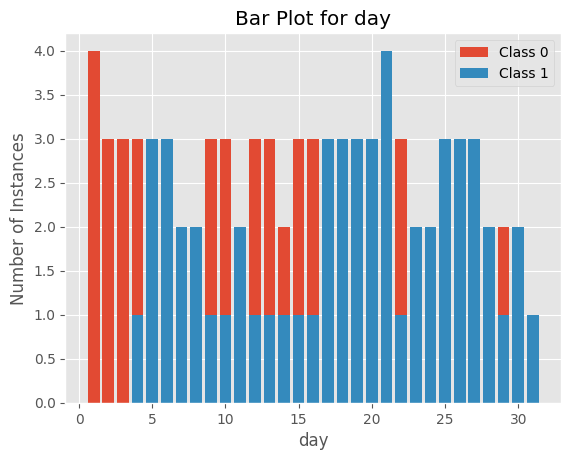

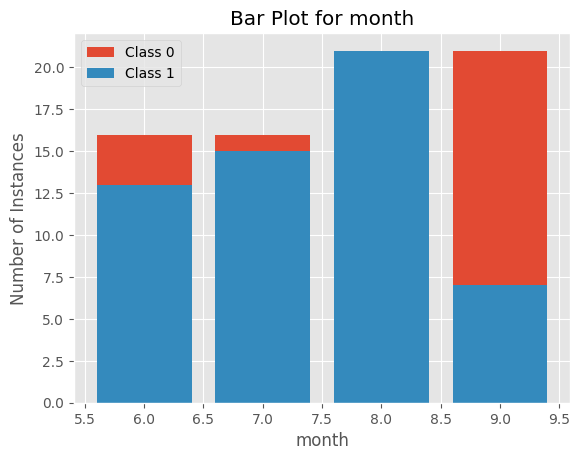

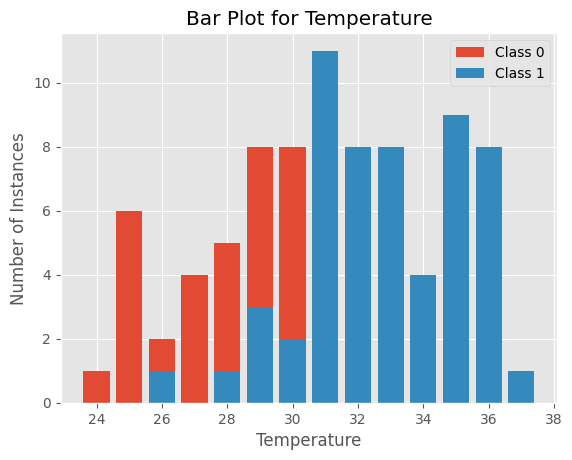

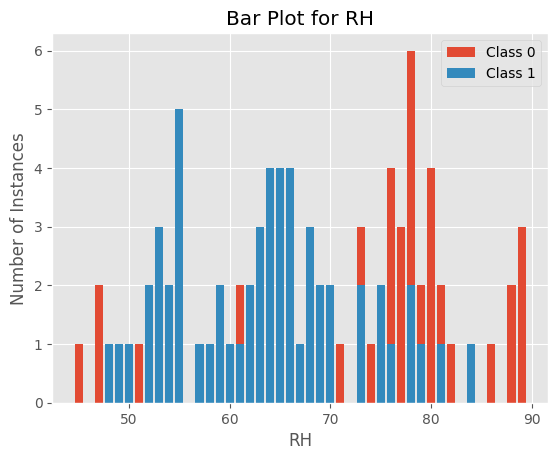

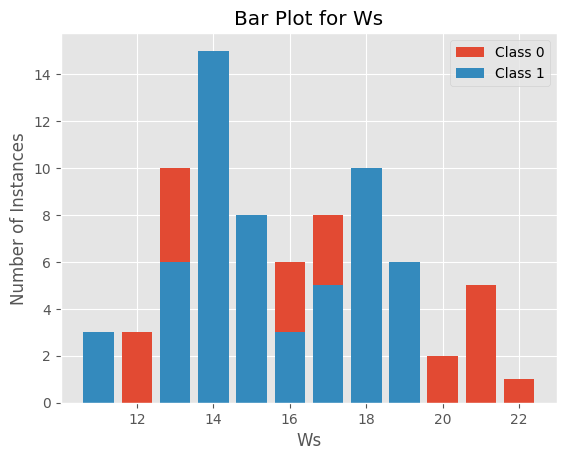

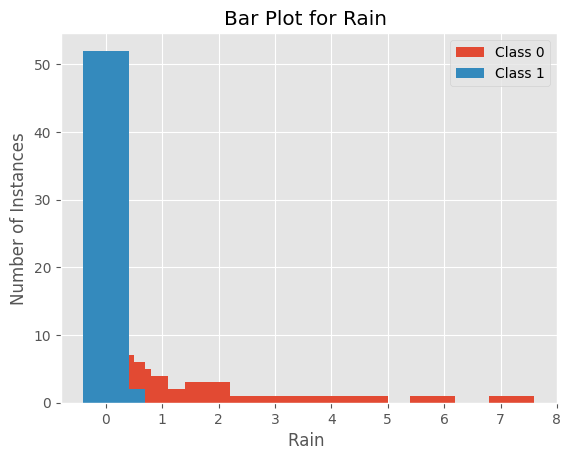

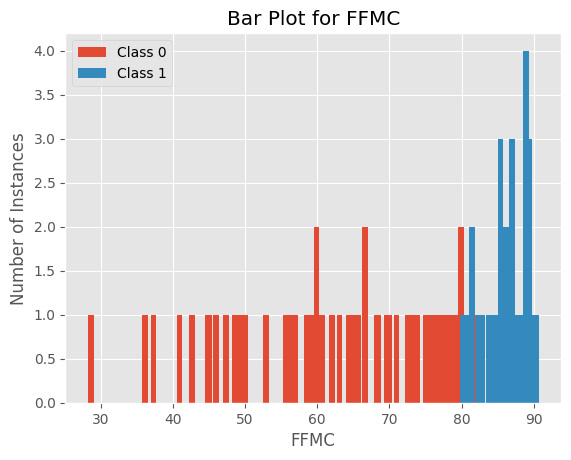

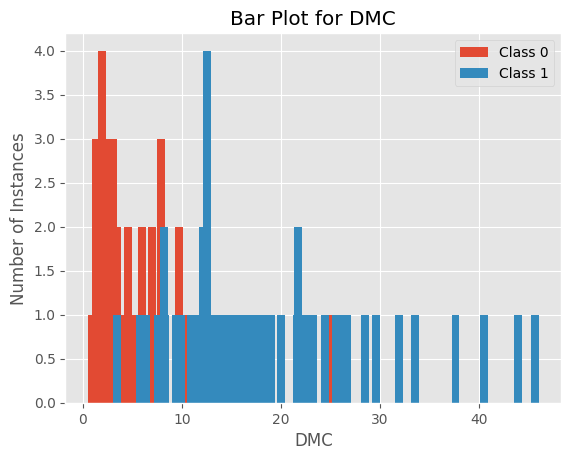

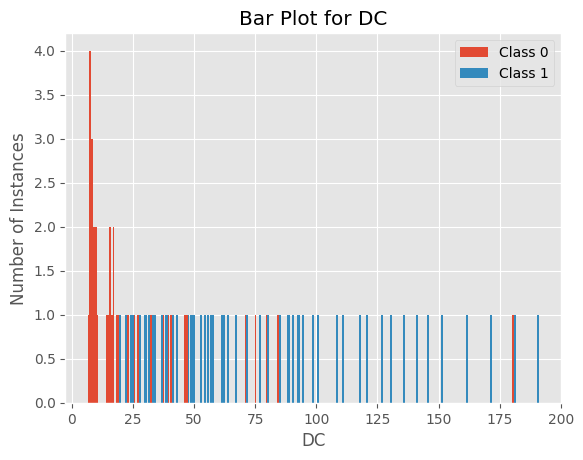

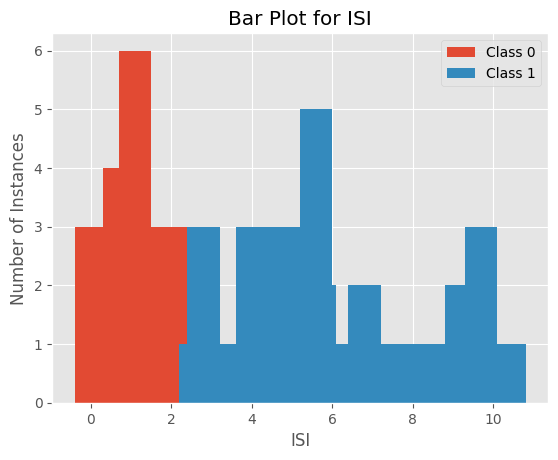

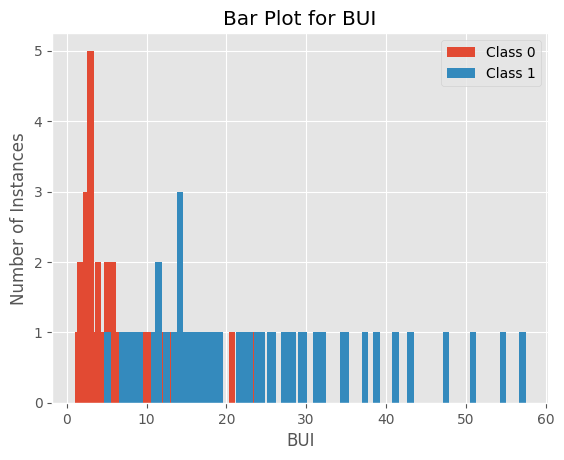

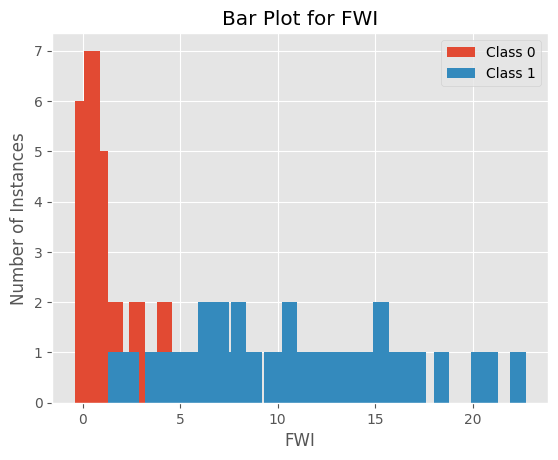

In [64]:
# Separate features from the target variable (Classes)
features = df.drop('Classes', axis=1)

# Group by class and count instances for each feature
grouped = df.groupby('Classes')

# Plotting each feature

for column in features.columns:
    fig, ax = plt.subplots()
    for label, group in grouped:
        counts = group[column].value_counts().sort_index()
        ax.bar(counts.index, counts, label=f'Class {label}')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Instances')
    ax.set_title(f'Bar Plot for {column}')
    ax.legend()
    plt.show()

In [ ]:
#remove the bin added for the plots
df.drop(columns=['month_bin', 'Temperature_bin', 'Rain_bin', 
'Ws_bin', 'RH_bin','dew point Avg_bin',
'FFMC_bin', 'DMC_bin', 'DC_bin', 'FWI_bin', 'ISI_bin', 'BUI_bin'],inplace=True)
df

,day,month,Temperature,Rain,Wd,Ws,Pres,RH,dew point Avg,FFMC,DMC,DC,FWI,ISI,BUI,Classes
479,22,8,30.3,0.0,268.0,8.8,1013.8,70.6,20.2,16.671342,2.760399,1.996573,8.057399,1.181752,1.181752,1
500,12,9,37.8,0.0,247.0,16.1,1014.3,55.1,17.1,24.021296,2.247376,6.288879,20.833275,5.590262,5.590262,0
565,16,6,28.5,0.0,317.0,11.3,1008.5,64.5,16.6,19.619750,2.100588,2.986075,10.139583,1.909621,1.909621,0
649,8,9,28.6,0.0,172.0,8.3,1015.2,79.8,20.4,17.368777,3.530672,0.000000,6.230463,0.861881,0.861881,1
681,10,10,25.5,4.1,280.0,7.4,1016.5,78.7,16.1,15.390399,0.139635,4.398488,7.096102,0.875186,0.875186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,26,10,29.0,0.0,225.0,12.2,1012.3,64.2,14.0,21.008328,29.716488,86.688995,248.461232,50.520450,50.520450,0
1770,28,10,25.0,0.0,146.0,8.6,1013.1,73.0,16.5,16.743074,29.749870,86.885772,198.408458,28.438546,28.438546,0
1771,29,10,25.0,0.0,190.0,8.7,1010.2,79.4,17.0,18.098224,29.840476,86.884386,214.631294,31.121538,31.121538,0
1772,30,10,27.4,0.0,188.0,12.3,1008.2,61.0,13.7,20.297931,29.747901,86.882740,240.523840,49.307387,49.307387,0


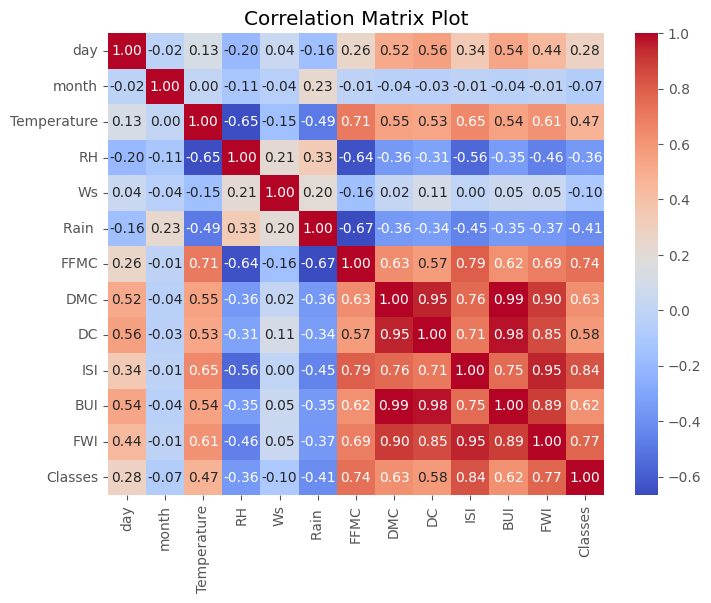

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot')
plt.show()

Remarks: From the heat Map we notice that there is a very strong correlation between BUI and DMC , DC so we wiil remove the BUI meseare 

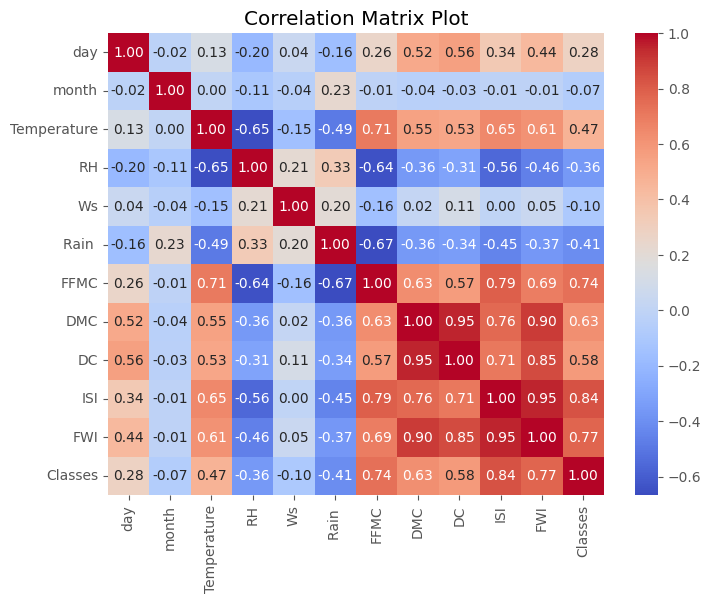

In [67]:
df = df.drop(['BUI'], axis=1)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot')
plt.show()

## Model training:

In [68]:

X = df.drop('Classes', axis=1) 
y = df['Classes'] 
#Split the Data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Logistic regression**

In [69]:

#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)


# Evaluate model
print("Logistic Regression:")
print("Training Accuracy:", logistic_model.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))


Logistic Regression:
Training Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [70]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

#evaluate the model
print("\nDecision Tree:")
print("Training Accuracy:", tree_model.score(X_train, y_train))
print("Testing Accuracy:", accuracy_score(y_test, tree_predictions))
print("Classification Report:\n", classification_report(y_test, tree_predictions))


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.97        15

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



**Random Forest**

In [71]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#evaluate model
print("Random Forest:")
print("Training Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest:
Training Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



**Gradient Boosting**

In [72]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

#Evaluate model
print("Gradient Boosting:")
print("Training Accuracy:", gb_model.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))

Gradient Boosting:
Training Accuracy: 1.0
Test Accuracy: 0.9655172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.97        15

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



## Most Important features:
We will identify the most important features by examining the coefficients utilized by the logistic regression model, as these coefficients provide insights into the impact of each feature on the target variable.

In [73]:
# Split the data into training and testing sets
X = df.drop('Classes', axis=1)
y = df['Classes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to the righ values of coefficients
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Get the coefficients of each feature
feature_importance = logistic_model.coef_[0]

# Print the feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
print(importance_df)


        Feature  Importance
0           day    0.088161
1         month    0.107543
2   Temperature   -0.069455
3            RH    0.282546
4            Ws   -0.091959
5         Rain    -0.447314
6          FFMC    1.408954
7           DMC   -0.150450
8            DC    0.277341
9           ISI    1.889174
10          FWI    1.385654


**Visualizing Features Importance:**

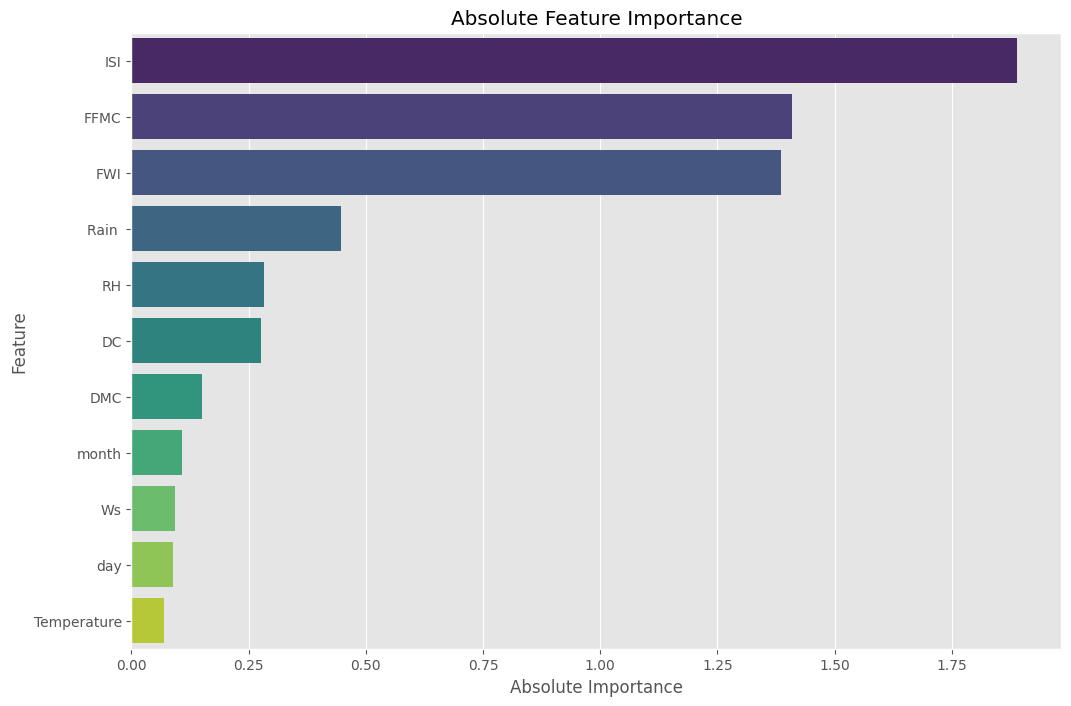

In [77]:
# take the absolute values of the importance to use it in the plot
importance_df['Absolute Importance'] = importance_df['Importance'].abs()

# Sort the DataFrame by absolute importance in descending order
sorted_importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute Importance', y='Feature', data=sorted_importance_df, palette='viridis')
plt.title('Absolute Feature Importance')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.show()


## Conclusion:
Our analysis revealed that three features, namely ISI (Initial Spread Index), FFMC (Fine Fuel Moisture Code), and FWI (Fire Weather Index), emerged as the most crucial predictors of fire danger.

These features play a pivotal role in assessing the potential for wildfire occurrence in Bejaya and guiding proactive measures to mitigate fire risks. By understanding the interplay between environmental factors and fire behavior, stakeholders can better allocate resources and implement strategies to safeguard communities and ecosystems from the devastating impacts of wildfires.